# HR Analytics: Job Change of Data Scientists




## 🍊 Setp 1.  
- 해결하고자 하는 문제가 적용되는 시나리오를 제시합니다.
  1. 회사에서 데이터 과학자를 위한 훈련과정을 진행하고, 많은 사람들이 이 훈련과정에 참가한다.
  2. 훈련에 지원한 지원자 중에서 회사에서 일 할 지원자를 예측하고 싶다.
  
- 문제 해결의 필요성에 대해 명확히 제시합니다.
  1. 회사에 일 할 지원자들을 예측할 수 있다면, 훈련과정을 계획할 때 비용과 시간을 줄이고 훈련의 질을 높일 수 있다.
  2. 회사에서 일 할 지원자들을 분류하는데 도움이 된다.
  3. 지원자에대해 분석하여 현재 회사 근무자들의 퇴사 요인 및 결정에 영향을 끼치는 요인을 해석할 수 있다.

- 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.
  - 분류문제

- 데이터셋에서 해결하고자 하는 문제 정의에 적절한 타겟을 선정합니다.
  - 회사에서 일할지 안할지
- 타겟을 잘 설명할 수 있을 만한 특성에 대한 가설을 설정합니다.
  1. 오랜 경력을 가진 지원자는 직업을 바꾸지 않는다.
  2. 적은 시간 훈련을 받은 지원자들은 다른 직업으로 전환한다.

> **1. 내가 세운 가설이 문제 해결에 의미가 있나요?**
  - 많은 경력직들이 직업전환을 하지 않는다면, 경력직들만을 위한 훈련 과정을 개설하여, 회사의 발전에 큰 기여할 수 있는 직원으로 채용할 수 있다. 
  - 적은 시간 훈력을 받은 지원자들이 다른 직업으로 전환한다면, 채용에 최소 훈련 시간 기준을 세워 회사에서 채용에 있어 근거있는 선택을 할 수 있다.   
  
> **2. 해당 특성을 target으로 지정한 이유를 설명하세요**
  - target 이 정해져있는 dataset.

### 🤙   데이터 불러오기

In [45]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIB_Project 2/HR_jobchange/hr_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIB_Project 2/HR_jobchange/hr_test.csv')

display(train.head(5), X_test.head(5))

# test data 에는 target 이 존재하지 않음.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## 📝 data description
- enrollee_id : 지원자 아이디
- city: 도시코드
- city_ development _index : 도시개발지수(도시규모?)
- gender: 성별
- relevent_experience: 관련 경험 여부(있다/없다)
- enrolled_university: 등록한 대학교 과정 유형 (없다/full time/park time)
- education_level: 교육수준(중졸/고졸/학사/석사/박사)
- major_discipline :전공분야
- experience: 경력(1년미만, 1~20년, 20년 이상)
- company_size: 현재 소속된 회사 직원 수
- company_type : 회사 유형 (NGO, 공기업,스타트업,유한회사..)
- last*new*job: 이직한지 얼마나 되었는지 (1~4)
- training_hours: 훈련 시간
- target: 0 – 직업 전환 희망하지 않음 , 1 – 직업 전환 희망

🍊
- 머신러닝에 적합한 형태로 데이터 타입을 변경합니다.
- 여러 테크닉을 사용해 결측치를 적절히 처리합니다.
- 본인의 전처리 과정에 대해 근거를 들어 설명합니다.
- 피쳐의 분포를 확인하고 이상치를 적절히 제거합니다.
- 1에서 세운 가설과 관련한 시각화 결과를 제시합니다.

> 1. Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
2. 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?

### Pandas profiling 통해서 feature 특성 확인하기

In [2]:
!pip install pandas-profiling==3.1.0
!pip install category_encoders
!pip install python-graphviz
!pip install eli5
!pip install pdpbox
!pip install shap
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.4 MB/s 
     |████████████████████████████████| 930 kB 37.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
import eli5
import shap
import xgboost

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment',  None)

from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder

from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_interact_plot, pdp_plot
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split,StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

warnings.filterwarnings(action='ignore')

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ✅   데이터 결측치 확인


In [46]:
[(x, train[x].isna().sum()) for x in train.columns if train[x].isna().any()]

[('gender', 4508),
 ('enrolled_university', 386),
 ('education_level', 460),
 ('major_discipline', 2813),
 ('experience', 65),
 ('company_size', 5938),
 ('company_type', 6140),
 ('last_new_job', 423)]

In [47]:
### 데이터 정보 나타내는 함수 만들기
def check_df(dataframe):
  print('###shape###')
  print(dataframe.shape)
  print('\n###types###')
  print(dataframe.dtypes)
  print('\n###NaN###')
  display(pd.DataFrame({'NA_cout': dataframe.isna().sum(),
                      'NA_ratio' : round(dataframe.isna().sum() / len(dataframe),2)}))

check_df(train)

###shape###
(19158, 14)

###types###
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

###NaN###


,NA_cout,NA_ratio
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,4508,0.24
relevent_experience,0,0.00
enrolled_university,386,0.02
education_level,460,0.02
major_discipline,2813,0.15
experience,65,0.00
company_size,5938,0.31


In [48]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
train['target'] = train['target'].astype('int')
train['target'].value_counts(normalize=True)

0    0.750652
1    0.249348
Name: target, dtype: float64

In [50]:
#train 수치형 데이터 분리해서 분석해보기
train_num = train.select_dtypes(exclude=['object'])
train_num.describe().T
# 수치형 데이터에는 결측값 X

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


0    0.75
1    0.25
Name: target, dtype: float64


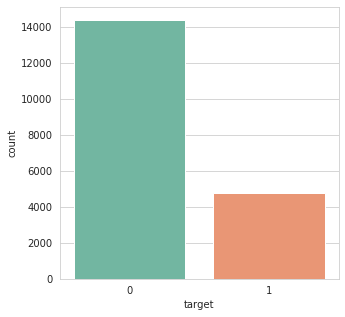

In [51]:
# target 분포 살펴보기
%matplotlib inline 
plt.figure(figsize=(5,5));
sns.countplot(data=train, x='target', palette = "Set2");
print(round(train_num['target'].value_counts(normalize=True),2))

- 타겟에 불균형이 확인된다.
  - 직업 전환을 희망하지 않는(0) 비율이 75%, 그에 반하는 사람들(1)은 비율이 25% 이다.
- 모델을 만들고 정확도뿐만 아니라 confusion matrix 또한 확인해봐야한다.

In [52]:
#enrollee_id
train_num['enrollee_id'].nunique() == len(train_num['enrollee_id'])

## id에서 중복값 없음 --> id 를 인덱스로 사용하면 된다


True

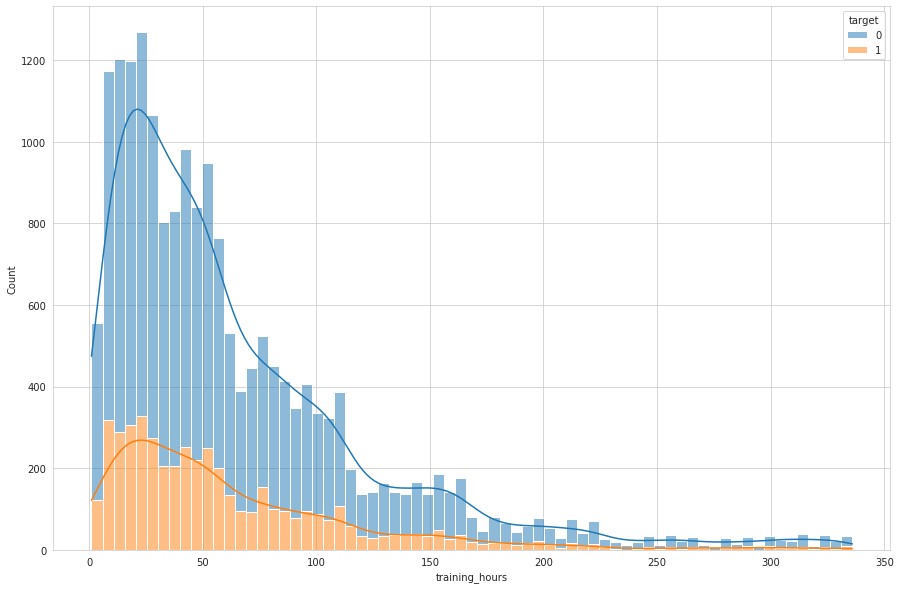

In [53]:
#training_hours 분포 알아보기
%matplotlib inline 
plt.figure(figsize=(15,10))
sns.histplot(data=train_num, x='training_hours', hue='target', multiple="stack", kde=True);

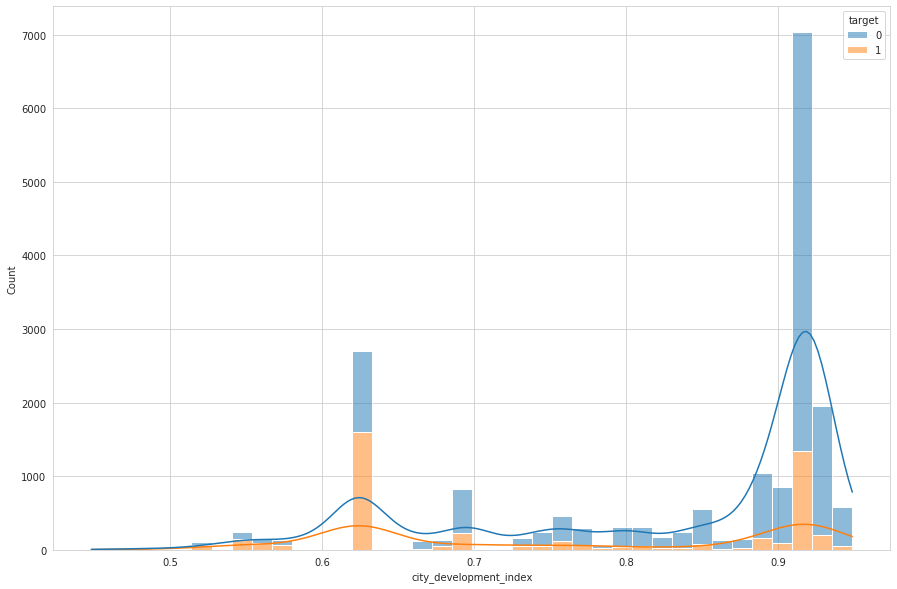

In [112]:
### city_development_index
plt.figure(figsize=(15,10))
sns.histplot(data=train_num, x='city_development_index', hue='target', multiple="stack", kde=True);

In [54]:
#문자형 데이터 확인하기
train_obj = train.select_dtypes(include=['object'])
display(train_obj.describe().T)
train_obj['target']= train['target']

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
city_73      280
city_100     275
city_71      266
city_11      247
city_90      197
Name: city, dtype: int64


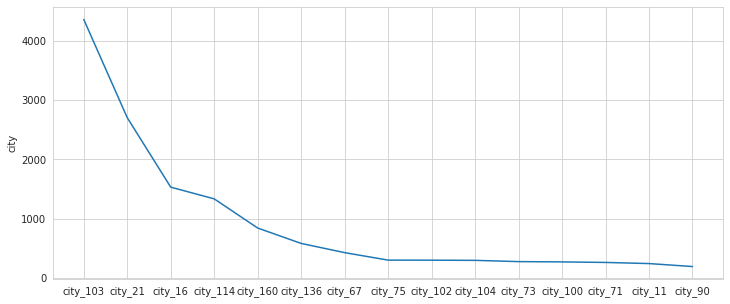

In [55]:
### city
check_city = train_obj['city'].value_counts().head(15)
print(check_city)
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.lineplot(data=check_city,palette='YlGnBu');

In [56]:
train_obj['city_num'] = train_obj['city'].apply(lambda x: int(x.replace('city_','')))
train['city'] = train_obj['city_num']
X_test['city'] = X_test['city'].apply(lambda x: int(x.replace('city_','')))


In [57]:
def check_feature(df):
    print("NaN ratio :",round(df.isna().sum() / len(df),3)*100,"%")
    print("values_list :",df.unique())
    print("<values_ratio>\n",round(df.value_counts(normalize=True),3))
#    plt.figure(figsize = (10,5))
#    sns.countplot(data= df, x= df, hue= 'target');
# 그래프도 같이 그릴 수 있는 방법은 없을까...

NaN ratio : 23.5 %
values_list : ['Male' nan 'Female' 'Other']
<values_ratio>
 Male      0.902
Female    0.085
Other     0.013
Name: gender, dtype: float64


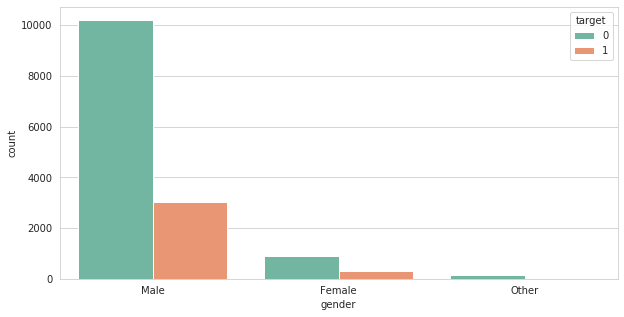

In [58]:
# gender
check_feature(train_obj['gender'])
plt.figure(figsize=(10,5))
sns.countplot(data=train_obj, x='gender',hue='target', palette = "Set2");

💡💡💡💡💡💡💡💡💡💡
- Male 의 비중이 매우 큼!

In [59]:
#데이터의 비율대로 결측치를 채워줄 것.
gender_male = round(train['gender'].isna().sum()*0.9)
gender_female = round(train['gender'].isna().sum()*0.09)
gender_other = round(train['gender'].isna().sum()*0.01)

train['gender'].fillna('Male', limit=gender_male, inplace=True)
train['gender'].fillna('Female', limit=gender_female, inplace=True)
train['gender'].fillna('Other', limit=gender_other, inplace=True)

X_test['gender'].fillna('Male', limit=gender_male, inplace=True)
X_test['gender'].fillna('Female', limit=gender_female, inplace=True)
X_test['gender'].fillna('Other', limit=gender_other, inplace=True)

train['gender'].isna().sum(), X_test['gender'].isna().sum()

(0, 0)

NaN ratio : 0.0 %
values_list : ['Has relevent experience' 'No relevent experience']
<values_ratio>
 Has relevent experience    0.72
No relevent experience     0.28
Name: relevent_experience, dtype: float64


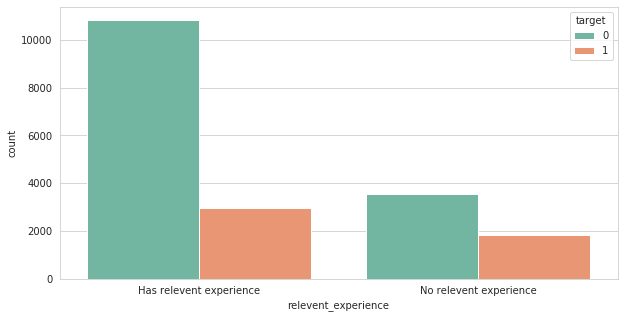

In [60]:
# relevent_experience 
check_feature(train_obj['relevent_experience'])
plt.figure(figsize = (10,5))
sns.countplot(data= train_obj, x= 'relevent_experience', hue= 'target', palette = "Set2");

💡💡💡💡💡💡💡💡💡💡💡
- 경험이 있는 지원자들의 대부분이 이 직업을 희망 했다.

In [61]:
#특성공학

train['relevent_experience'] = train['relevent_experience'].apply(lambda x: int(x.replace('Has relevent experience','1').replace('No relevent experience','0')))
X_test['relevent_experience'] = X_test['relevent_experience'].apply(lambda x: int(x.replace('Has relevent experience','1').replace('No relevent experience','0')))

NaN ratio : 2.0 %
values_list : ['no_enrollment' 'Full time course' nan 'Part time course']
<values_ratio>
 no_enrollment       0.736
Full time course    0.200
Part time course    0.064
Name: enrolled_university, dtype: float64


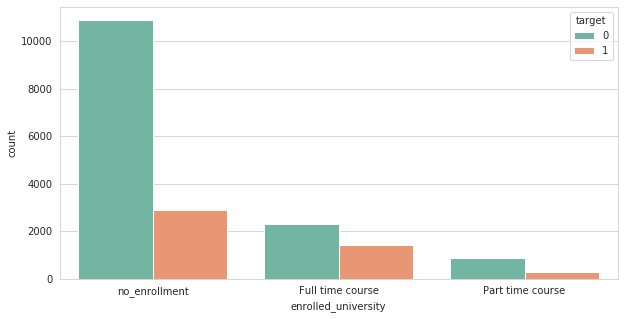

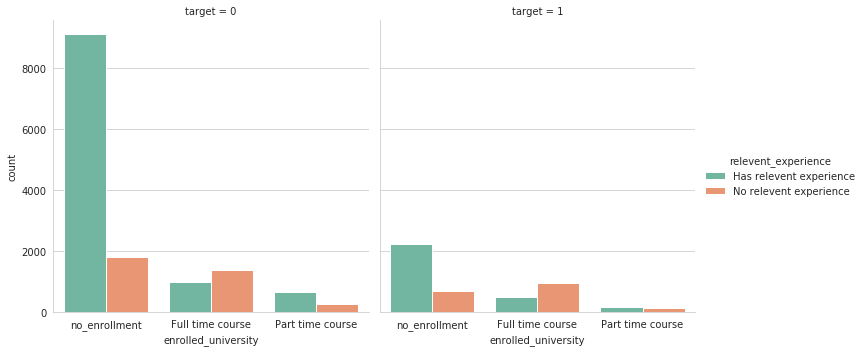

In [62]:
# enrolled_university (isna)
check_feature(train_obj['enrolled_university'])
plt.figure(figsize = (10,5));
sns.countplot(data= train_obj, x= 'enrolled_university', hue= 'target', palette = "Set2");
sns.catplot(data=train_obj, x= 'enrolled_university', hue='relevent_experience', col='target', kind='count', height=5, palette = "Set2");

💡💡💡💡💡💡💡💡💡💡💡

현재 대학교를 등록하지 않은 지원자가 압도적으로 직업 전환하지 않는다.
관련 경험은 없지만 대학을 졸업한 지원자가 > 관련 경험도 있고 대학도 졸업한 지원자보다 많다.

In [63]:
#데이터의 비율대로 결측치를 채워줄 것.
no_enrollment = round(train['enrolled_university'].isna().sum()*0.74)
Full_time_course = round(train['enrolled_university'].isna().sum()*0.2)
Part_time_course = round(train['enrolled_university'].isna().sum()*0.06)

train['enrolled_university'].fillna('no_enrollment', limit=no_enrollment, inplace=True)
train['enrolled_university'].fillna('Full time course', limit=Full_time_course, inplace=True)
train['enrolled_university'].fillna('Part time course', limit=Part_time_course, inplace=True)

X_test['enrolled_university'].fillna('no_enrollment', limit=no_enrollment, inplace=True)
X_test['enrolled_university'].fillna('Full time course', limit=Full_time_course, inplace=True)
X_test['enrolled_university'].fillna('Part time course', limit=Part_time_course, inplace=True)

train['enrolled_university'].isna().sum(), X_test['enrolled_university'].isna().sum()

(0, 0)

NaN ratio : 2.4 %
values_list : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
<values_ratio>
 Graduate          0.620
Masters           0.233
High School       0.108
Phd               0.022
Primary School    0.016
Name: education_level, dtype: float64


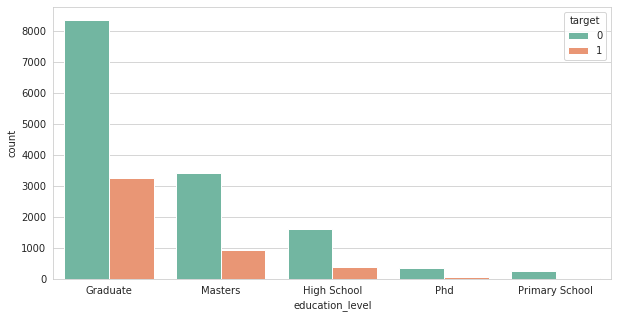

In [64]:
# education_level (isna)
check_feature(train_obj['education_level'])
plt.figure(figsize = (10,5))
sns.countplot(data= train_obj, x= 'education_level', hue= 'target', palette = "Set2");

💡💡💡💡💡💡💡💡💡💡💡
- 상식적으로도 대졸자들이 직업을 찾는다.


In [65]:
#데이터의 비율대로 결측치를 채워줄 것.
Graduate = round(train['education_level'].isna().sum()*0.62)
Masters = round(train['education_level'].isna().sum()*0.24)
High_School = round(train['education_level'].isna().sum()*0.11)
Phd = round(train['education_level'].isna().sum()*0.02)
Primary_School = round(train['education_level'].isna().sum()*0.02)

train['education_level'].fillna('Graduate', limit=Graduate, inplace=True)
train['education_level'].fillna('Masters', limit=Masters, inplace=True)
train['education_level'].fillna('High School', limit=High_School, inplace=True)
train['education_level'].fillna('Phd', limit=Phd, inplace=True)
train['education_level'].fillna('Primary School', limit=Primary_School, inplace=True)

X_test['education_level'].fillna('Graduate', limit=Graduate, inplace=True)
X_test['education_level'].fillna('Masters', limit=Masters, inplace=True)
X_test['education_level'].fillna('High School', limit=High_School, inplace=True)
X_test['education_level'].fillna('Phd', limit=Phd, inplace=True)
X_test['education_level'].fillna('Primary School', limit=Primary_School, inplace=True)

train['education_level'].isna().sum(), X_test['education_level'].isna().sum()

(0, 0)

NaN ratio : 14.7 %
values_list : ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
<values_ratio>
 STEM               0.887
Humanities         0.041
Other              0.023
Business Degree    0.020
Arts               0.015
No Major           0.014
Name: major_discipline, dtype: float64


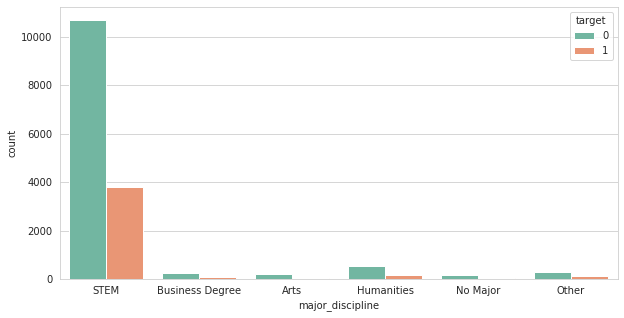

In [66]:
# major_discipline (isna)
check_feature(train_obj['major_discipline'])
plt.figure(figsize = (10,5))
sns.countplot(data= train_obj, x= 'major_discipline', hue= 'target', palette = "Set2");

In [67]:
#데이터의 비율대로 결측치를 채워줄 것.
STEM = round(train['major_discipline'].isna().sum()*0.89)
Business_Degree = round(train['major_discipline'].isna().sum()*0.04)
Arts = round(train['major_discipline'].isna().sum()*0.03)
Humanities = round(train['major_discipline'].isna().sum()*0.02)
No_Major = round(train['major_discipline'].isna().sum()*0.01)
Other = round(train['major_discipline'].isna().sum()*0.01)

train['major_discipline'].fillna('STEM', limit=STEM, inplace=True)
train['major_discipline'].fillna('Business Degree', limit=Business_Degree, inplace=True)
train['major_discipline'].fillna('Arts', limit=Arts, inplace=True)
train['major_discipline'].fillna('Humanities', limit=Humanities, inplace=True)
train['major_discipline'].fillna('No Major', limit=No_Major, inplace=True)
train['major_discipline'].fillna('Other', limit=Other, inplace=True)

X_test['major_discipline'].fillna('STEM', limit=STEM, inplace=True)
X_test['major_discipline'].fillna('Business Degree', limit=Business_Degree, inplace=True)
X_test['major_discipline'].fillna('Arts', limit=Arts, inplace=True)
X_test['major_discipline'].fillna('Humanities', limit=Humanities, inplace=True)
X_test['major_discipline'].fillna('No Major', limit=No_Major, inplace=True)
X_test['major_discipline'].fillna('Other', limit=Other, inplace=True)

train['major_discipline'].isna().sum(), X_test['major_discipline'].isna().sum()

(0, 0)

NaN ratio : 0.3 %
values_list : ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
<values_ratio>
 >20    0.172
5      0.075
4      0.073
3      0.071
6      0.064
2      0.059
7      0.054
10     0.052
9      0.051
8      0.042
15     0.036
11     0.035
14     0.031
1      0.029
<1     0.027
16     0.027
12     0.026
13     0.021
17     0.018
19     0.016
18     0.015
20     0.008
Name: experience, dtype: float64


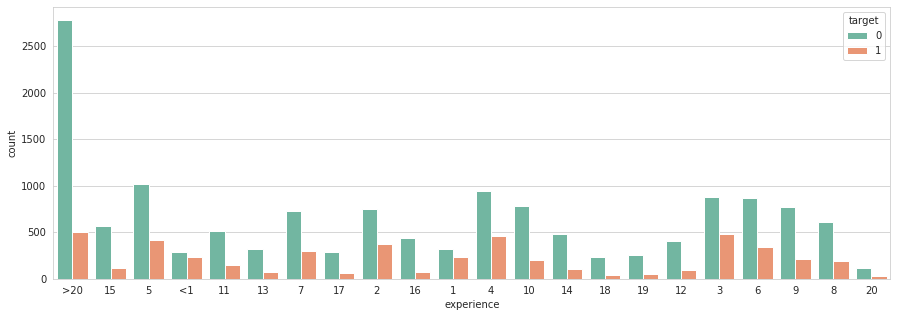

In [68]:
# experience (isna)
check_feature(train_obj['experience'])
plt.figure(figsize = (15,5))
sns.countplot(data= train_obj, x= 'experience', hue= 'target', palette = "Set2");

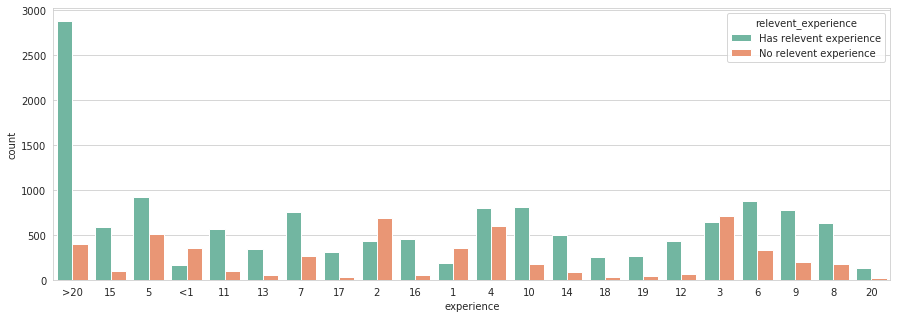

In [69]:
plt.figure(figsize = (15,5))
sns.countplot(data= train_obj, x= 'experience', hue= 'relevent_experience', palette = "Set2");

💡💡💡💡💡💡💡💡💡💡💡
- 20년 이상 근무한 지원자가 많다.
- 경험이 2년 이상되면 이 직종으로 직업을 구하는 사람들이 대부분 두배로 많다.
- 경력 특성이 있기에 관련 경험이 있는지 여부의 특성을 지워도 된다고 생각했지만 , 경력 특성이 관련경력을 말하는 것은 아니었다.

In [70]:
#특성공학
train = train.dropna(subset=['experience'],inplace=False)
X_test = X_test.dropna(subset=['experience'],inplace=False)

train['experience'] = train['experience'].apply(lambda x: int(x.replace('>20','20').replace('<1','0')))
X_test['experience'] = X_test['experience'].apply(lambda x: int(x.replace('>20','20').replace('<1','0')))

train['experience'].isna().sum(), X_test['experience'].isna().sum()

(0, 0)

NaN ratio : 31.0 %
values_list : [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
<values_ratio>
 50-99        0.233
100-500      0.194
10000+       0.153
10/49        0.111
1000-4999    0.100
<10          0.099
500-999      0.066
5000-9999    0.043
Name: company_size, dtype: float64


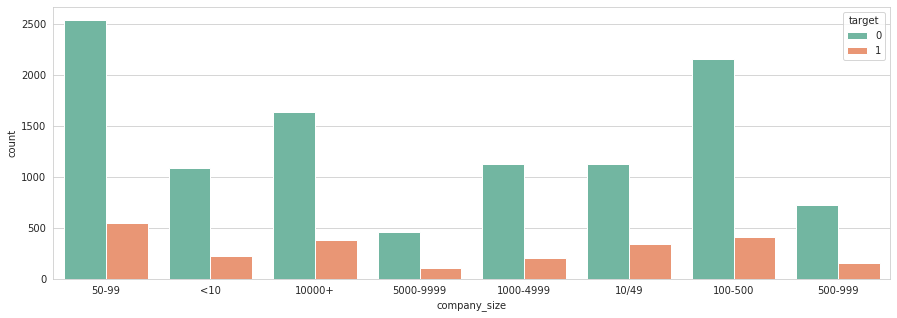

In [71]:
# company_size (isna)
check_feature(train_obj['company_size'])
plt.figure(figsize = (15,5))
sns.countplot(data= train_obj, x= 'company_size', hue= 'target', palette = "Set2");

💡💡💡💡💡💡💡💡💡💡💡
- 회사 규모가 타겟에 영향을 미친다고 생각 들지 않는다.

In [72]:
# 타겟에 영향을 미친다는 생각이 들지 않지만, 혹시 결측값이 무언가를 나타낼 수도 있으거라고 생각하여 0으로 채움
train['company_size'] = train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)
train['company_size'].fillna('0', inplace=True)

X_test['company_size'] = X_test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)
X_test['company_size'].fillna('0', inplace=True)

NaN ratio : 32.0 %
values_list : [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
<values_ratio>
 Pvt Ltd                0.754
Funded Startup         0.077
Public Sector          0.073
Early Stage Startup    0.046
NGO                    0.040
Other                  0.009
Name: company_type, dtype: float64


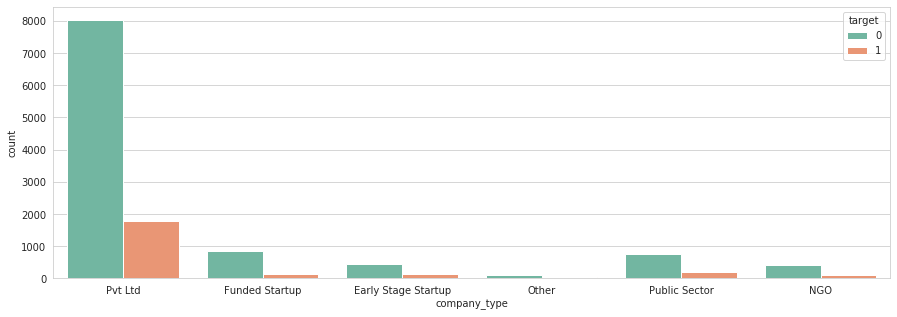

In [73]:
# company_type (isna)
check_feature(train_obj['company_type'])
plt.figure(figsize = (15,5))
sns.countplot(data= train_obj, x= 'company_type', hue= 'target', palette = "Set2");

In [74]:

# 타겟에 영향을 미친다는 생각이 들지 않지만, 혹시 결측값이 무언가를 나타낼 수도 있으거라고 생각하여 0으로 채움 (결측값이 30%이상이 된다)
train['company_type'].fillna('unknown', inplace=True)
X_test['company_type'].fillna('unknown', inplace=True)

NaN ratio : 2.1999999999999997 %
values_list : ['1' '>4' 'never' '4' '3' '2' nan]
<values_ratio>
 1        0.429
>4       0.176
2        0.155
never    0.131
4        0.055
3        0.055
Name: last_new_job, dtype: float64


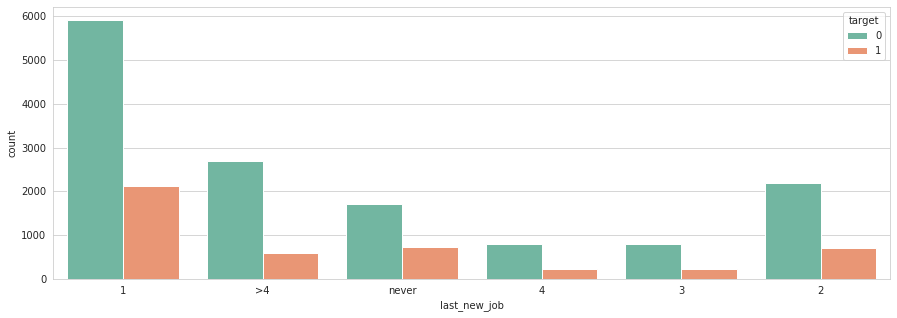

In [75]:
# last_new_job (isna)
check_feature(train_obj['last_new_job'])
plt.figure(figsize = (15,5))
sns.countplot(data= train_obj, x= 'last_new_job', hue= 'target', palette = "Set2");

In [76]:
train.dropna(subset=['last_new_job'],inplace=True)
X_test.dropna(subset=['last_new_job'],inplace=True)

train['last_new_job'].isna().sum(), X_test['last_new_job'].isna().sum()

(0, 0)

In [77]:
train['last_new_job'] = train['last_new_job'].apply(lambda x: int(x.replace('>4','4').replace('never','0')))
X_test['last_new_job'] = X_test['last_new_job'].apply(lambda x: int(x.replace('>4','4').replace('never','0')))

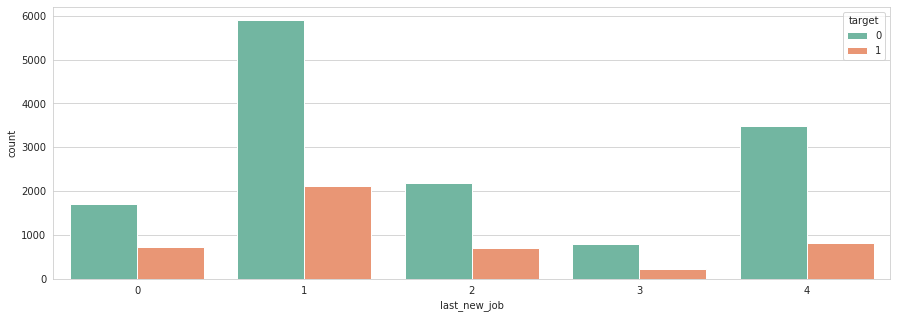

In [78]:
plt.figure(figsize = (15,5))
sns.countplot(data= train, x= 'last_new_job', hue= 'target', palette = "Set2");

In [79]:
train.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience         int64
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

# " 📊 Train - Test Split "

In [ ]:
train.shape

In [80]:

train, val = train_test_split(train, train_size=0.75, test_size=0.25, random_state=42, stratify=train['target'])


target = 'target'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]


print("X_train",len(X_train))
print("X_val",len(X_val))
print("y_train",len(y_train))
print("y_val",len(y_val))


X_train 14020
X_val 4674
y_train 14020
y_val 4674


In [82]:
X_train.shape, X_test.shape

((14020, 13), (2085, 13))

In [89]:
# 인코딩 진행
enc = OrdinalEncoder(cols = ['gender','enrolled_university','education_level','major_discipline','company_size','company_type'])
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)
X_val = enc.transform(X_val)
X_train.shape, X_test.shape, X_val.shape



((14020, 13), (2085, 13), (4674, 13))

In [133]:
X_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
10530,23945,103,0.920,1,1,1,1,1,20,1,1,4,224
553,31156,61,0.913,2,1,1,2,1,20,2,1,1,77
1640,10615,123,0.738,2,1,1,1,1,14,3,1,2,29
3034,12430,11,0.550,2,1,1,1,1,5,4,1,1,74
1093,5180,101,0.558,2,1,1,1,1,4,2,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,10987,103,0.920,2,1,1,2,1,6,8,1,2,62
15630,30713,21,0.624,2,1,1,1,1,10,1,1,0,17
9323,12911,173,0.878,2,1,3,2,1,14,3,1,2,61
8865,19031,16,0.910,2,1,1,1,1,19,4,2,2,11


In [135]:
X_train1= X_train.drop(['gender','major_discipline','last_new_job'],axis=1,inplace=False) 

In [136]:
X_val1 = X_val.drop(['gender','major_discipline','last_new_job'],axis=1,inplace=False) 

10999    1
13986    1
14405    1
6552     1
17551    1
        ..
15708    0
15051    0
14659    0
6707     0
9170     0
Name: target, Length: 14020, dtype: int64


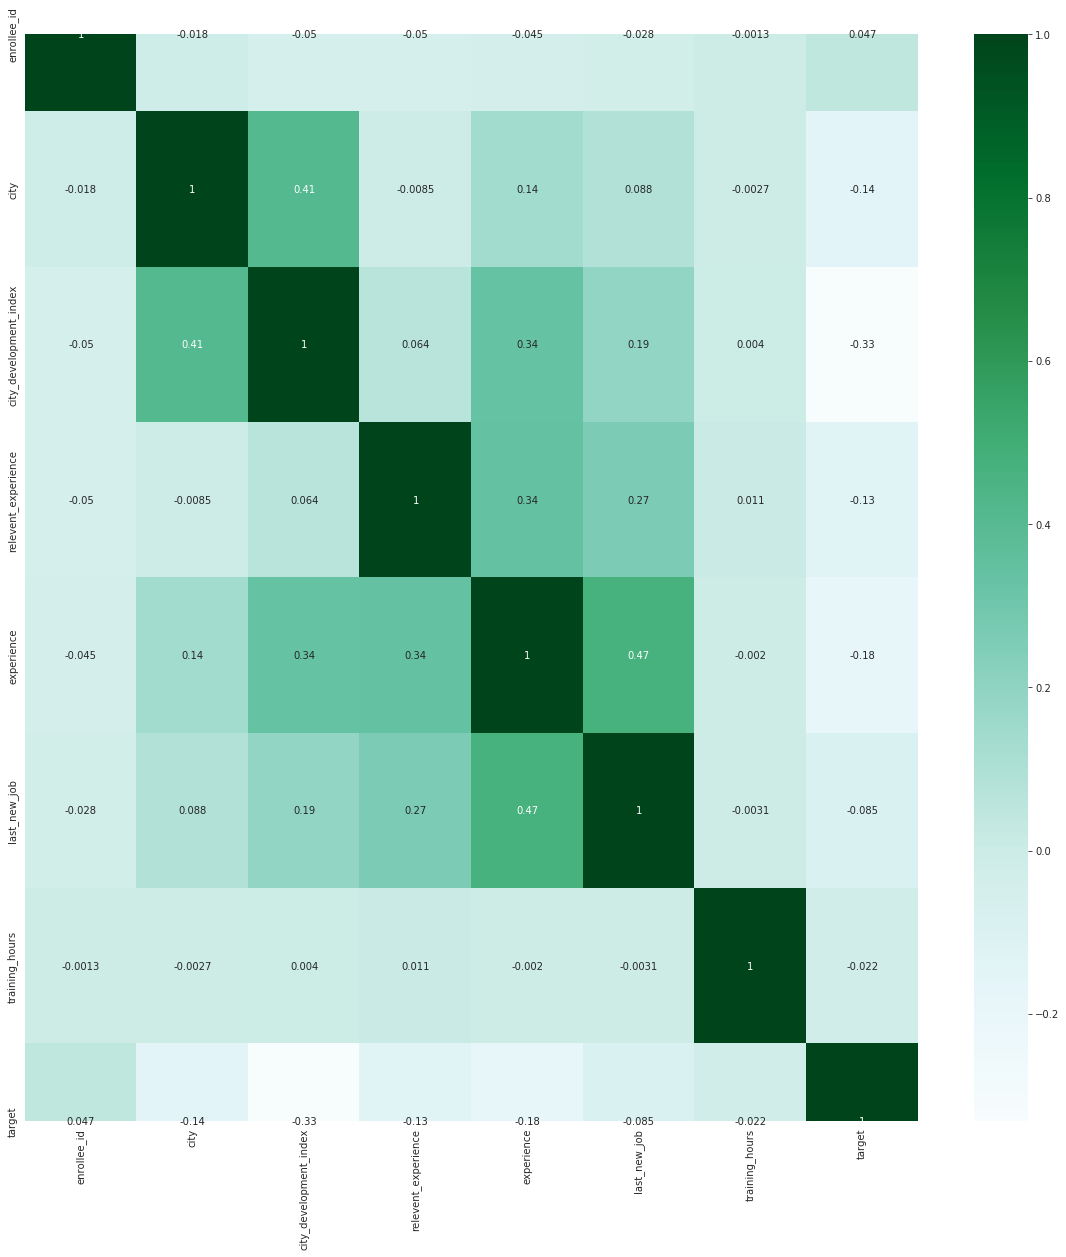

In [84]:
#어떤 특성이 상관관계가 높은가 
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='BuGn')
train_corr = train.corr()
print(train['target'].sort_values(ascending=False))

In [137]:
rf = RandomForestClassifier()

# A parameter grid for RF
params = {
        'max_depth': [5, 10, 20, 30],
        'max_features': [0.5, 1, 1.5, 2, 5],
        'min_samples_leaf': [3, 5, 10, 20],
        'min_samples_split': [1,10,50,100,300],
        'n_estimators': [100,200,300,500]
        }

random_cv=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    cv=7,
    n_iter=7,
    scoring='roc_auc',
    n_jobs=1,
    verbose=3,
    return_train_score=True,
    random_state=42)
random_cv.fit(X_train1,y_train)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
[CV 1/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.965, test=0.764) total time=   7.2s
[CV 2/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.963, test=0.782) total time=  13.5s
[CV 3/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.963, test=0.795) total time=   9.2s
[CV 4/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.964, test=0.777) total time=   7.9s
[CV 5/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.965, test=0.779) total time=   7.0s
[CV 6/7] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=(train=0.963, test=0.795) total time=   7.1s
[CV 7/7] E

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=7, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_features': [0.5, 1, 1.5, 2, 5],
                                        'min_samples_leaf': [3, 5, 10, 20],
                                        'min_samples_split': [1, 10, 50, 100,
                                                              300],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [86]:
#best parameter 
random_cv.best_params_

{'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 500}

In [138]:
rf_pipe = Pipeline(steps = [('std_scale', StandardScaler()),
                            ('RF', RandomForestClassifier(max_depth= 20,
                            max_features= 2,
                            min_samples_leaf= 10,
                            min_samples_split= 100,
                            n_estimators= 500))
])
rf_pipe.fit(X_train1, y_train)
prediction_rf= rf_pipe.predict(X_val1)
cm_trfc = confusion_matrix(y_val, prediction_rf)
trfc_df = pd.DataFrame(data=[accuracy_score(y_val, prediction_rf), recall_score(y_val, prediction_rf),
                   precision_score(y_val, prediction_rf), roc_auc_score(y_val, prediction_rf)], 
             columns=[' Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])
trfc_df


,Random Forest Score
Accuracy,0.789688
Recall,0.375000
Precision,0.621583
ROC AUC Score,0.650163


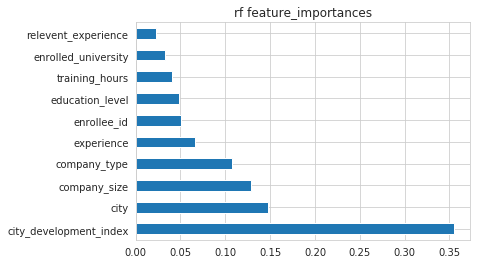

In [140]:
feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=X_train1.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.title('rf feature_importances');

In [149]:
permuter = PermutationImportance(
    rf_pipe.named_steps['RF'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = rf_pipe.named_steps['std_scale'].transform(X_val1)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);
feature_names = X_val1.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

enrolled_university       0.000000
education_level           0.000000
company_size              0.000000
company_type              0.000000
enrollee_id               0.000257
relevent_experience       0.000471
training_hours            0.000941
experience                0.010227
city                      0.028412
city_development_index    0.039581
dtype: float64

In [150]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0396 ± 0.0083,city_development_index
0.0284 ± 0.0031,city
0.0102 ± 0.0044,experience
0.0009 ± 0.0010,training_hours
0.0005 ± 0.0012,relevent_experience
0.0003 ± 0.0028,enrollee_id
0 ± 0.0000,company_type
0 ± 0.0000,company_size
0 ± 0.0000,education_level
0 ± 0.0000,enrolled_university


In [141]:
dt = DecisionTreeClassifier()

# A parameter grid for DT
params = {
        'criterion': ['gini', 'entropy','log_loss'],
        'max_features': [1, 1.5, 2, 5,10],
        'max_depth': [5,10, 20,30],
        'min_samples_leaf': [5, 10, 15, 20],
        'min_samples_split': [1,10,50,100,300]
        }

random_cv=RandomizedSearchCV(
    estimator=dt,
    param_distributions=params,
    cv=7,
    n_iter=7,
    scoring='roc_auc',
    n_jobs=1,
    verbose=3,
    return_train_score=True,
    random_state=42)
random_cv.fit(X_train1,y_train)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
[CV 1/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/7] END criterion=log_loss, max_depth=30, max_features=1.5, min_samples_leaf=10, min_samples_split=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=7, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 20, 30],
                                        'max_features': [1, 1.5, 2, 5, 10],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [1, 10, 50, 100,
                                                              300]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [142]:
#best parameter 
random_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [143]:
dt_pipe = Pipeline(steps = [('std_scale', StandardScaler()),
                            ('dt',DecisionTreeClassifier(criterion='entropy',
                                                        max_features=5, 
                                                        max_depth=5, 
                                                        min_samples_leaf=10, 
                                                        min_samples_split=10))
                            ])
dt_pipe.fit(X_train1,y_train)
prediction_dt= dt_pipe.predict(X_val1)
cm_dt = confusion_matrix(y_val, prediction_dt)
dt_df = pd.DataFrame(data=[accuracy_score(y_val, prediction_dt), recall_score(y_val, prediction_dt),
                   precision_score(y_val, prediction_dt), roc_auc_score(y_val, prediction_dt)], 
             columns=[' Decision Tree Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])
dt_df

,Decision Tree Score
Accuracy,0.787762
Recall,0.401042
Precision,0.604712
ROC AUC Score,0.657647


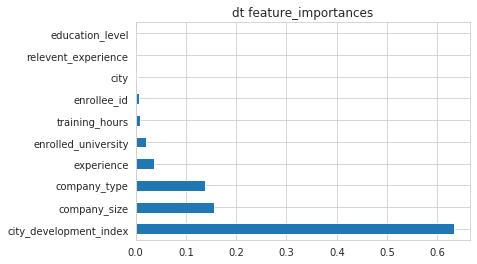

In [144]:
feature_importances = pd.Series(dt_pipe.steps[1][1].feature_importances_, index=X_train1.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.title('dt feature_importances');

In [145]:
clf = XGBClassifier()

# A parameter grid for XGBoost
params = {
        'min_child_weight': [5, 10, 20, 30],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.3, 0.6,0.8, 1],
        'colsample_bytree': [0.1, 0.3, 0.6, 0.8,1],
        'max_depth': [2, 3, 4, 5,6,7]
        }

random_cv=RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    cv=7,
    n_iter=7,
    scoring='roc_auc',
    n_jobs=1,
    verbose=3,
    return_train_score=True,
    random_state=42)
random_cv.fit(X_train1,y_train)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
[CV 1/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.810, test=0.770) total time=   1.1s
[CV 2/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.807, test=0.794) total time=   1.1s
[CV 3/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.806, test=0.792) total time=   1.1s
[CV 4/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.809, test=0.784) total time=   1.1s
[CV 5/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.808, test=0.780) total time=   1.1s
[CV 6/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_weight=30, subsample=0.3;, score=(train=0.804, test=0.803) total time=   1.2s
[CV 7/7] END colsample_bytree=0.3, gamma=2, max_depth=7, min_child_wei

RandomizedSearchCV(cv=7, estimator=XGBClassifier(), n_iter=7, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.6, 0.8,
                                                             1],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_child_weight': [5, 10, 20, 30],
                                        'subsample': [0.3, 0.6, 0.8, 1]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [146]:
#best parameter 
random_cv.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 4,
 'min_child_weight': 10,
 'subsample': 1}

In [148]:
clf_pipe = Pipeline(steps = [('std_scale', StandardScaler()),
                            ('XGB',XGBClassifier(colsample_bytree= 0.6,
 gamma= 1,
 max_depth= 4,
 min_child_weigh= 10,
 subsample= 1))
])

clf_pipe.fit(X_train1, y_train)
prediction_xgb= clf_pipe.predict(X_val1)
cm_dt = confusion_matrix(y_val, prediction_xgb)
XGB_df = pd.DataFrame(data=[accuracy_score(y_val, prediction_xgb), recall_score(y_val, prediction_xgb),
                   precision_score(y_val, prediction_xgb), roc_auc_score(y_val, prediction_xgb)], 
             columns=[' XGB Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])
XGB_df

,XGB Score
Accuracy,0.783911
Recall,0.346354
Precision,0.608232
ROC AUC Score,0.636692


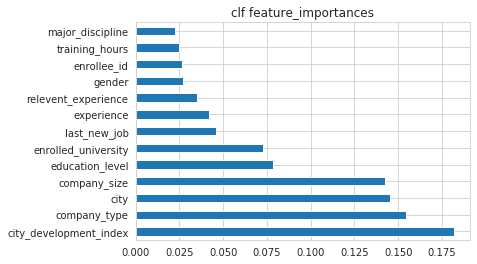

In [123]:
feature_importances = pd.Series(clf_pipe.steps[1][1].feature_importances_, index=X_train1.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.title('clf feature_importances');

In [99]:
rf_train_predict = rf_pipe.predict(X_train)
rf_test_predict = rf_pipe.predict(X_val)

dt_train_predict = dt_pipe.predict(X_train)
dt_test_predict = dt_pipe.predict(X_val)

clf_train_predict = clf_pipe.predict(X_train)
clf_test_predict = clf_pipe.predict(X_val)

In [100]:
print('Random Forest classification_report on test_set')
print(' ')
print(classification_report(y_val, rf_test_predict))

Random Forest classification_report on test_set
 
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3522
           1       0.62      0.30      0.41      1152

    accuracy                           0.78      4674
   macro avg       0.71      0.62      0.64      4674
weighted avg       0.76      0.78      0.75      4674



In [101]:
print('Random Forest classification_report on train_set')
print(' ')
print(classification_report(y_train, rf_train_predict))

Random Forest classification_report on train_set
 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     10565
           1       0.67      0.45      0.53      3455

    accuracy                           0.81     14020
   macro avg       0.75      0.69      0.71     14020
weighted avg       0.79      0.81      0.79     14020



In [102]:
print('Decision Tree classification_report on test_set')
print(' ')
print(classification_report(y_val, dt_test_predict))

Decision Tree classification_report on test_set
 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3522
           1       0.62      0.39      0.48      1152

    accuracy                           0.79      4674
   macro avg       0.72      0.65      0.67      4674
weighted avg       0.77      0.79      0.77      4674



In [103]:
print('Decision Tree classification_report on train_set')
print(' ')
print(classification_report(y_train, dt_train_predict))

Decision Tree classification_report on train_set
 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     10565
           1       0.60      0.39      0.47      3455

    accuracy                           0.79     14020
   macro avg       0.71      0.65      0.67     14020
weighted avg       0.77      0.79      0.77     14020



In [104]:
print('XGBoost classification_report on test_set')
print(' ')
print(classification_report(y_val, clf_test_predict))

XGBoost classification_report on test_set
 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3522
           1       0.61      0.35      0.45      1152

    accuracy                           0.79      4674
   macro avg       0.71      0.64      0.66      4674
weighted avg       0.76      0.79      0.76      4674



In [105]:
print('XGBoost classification_report on train_set')
print(' ')
print(classification_report(y_train, clf_train_predict))

XGBoost classification_report on train_set
 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10565
           1       0.64      0.54      0.59      3455

    accuracy                           0.81     14020
   macro avg       0.75      0.72      0.73     14020
weighted avg       0.80      0.81      0.81     14020



In [106]:
predict = clf_pipe.predict_proba(X_test)
predict = predict[:, 1]

In [107]:
# Create a  DataFrame

submission = pd.DataFrame({'enrollee_id':X_test['enrollee_id'],'target':predict})
submission.to_csv('submission.csv',index=False)

🍊
- baseline 모델을 선정하고 이에 기반해 모델링 성능을 평가합니다.
- 반복적인 Feature Engineering 과정을 통해 모델 성능을 최적화합니다.
- 문제 정의에 맞는 평가 지표를 선택하여 모델의 성능을 설명합니다.
- 교차검증이나 hold-out 기법을 사용해 학습 성능과 일반화 성능을 구분하여 제시합니다.
- 여러 수치적 지표 및 permutation importance, pdp, shap 등을 활용하여 최종모델을 설명합니다.   
- 시각화는 설명이 가장 중요합니다.
- 1에서 제시한 가설을 해결합니다.

>1. 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
2. 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
3. 최종 모델과 일반화 성능에 관해 설명하세요.
4. 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?